In [117]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

data_dir = '/Users/jacksimonson/Springboard_Work/data/'
img_train_dir = 'training-mask'
img_test_dir = 'test-mask'
numpy_train_dir = 'training-mask-arrays'
numpy_test_dir = 'test-mask-arrays'
img_path = '/Users/jacksimonson/Springboard_Work/data/training-image/Calc-Training_P_00005_RIGHT_CC_MALIGNANT.png'
mask_path = '/Users/jacksimonson/Springboard_Work/data/training-mask/Calc-Training_P_00005_RIGHT_CC_MALIGNANT.png'

### Function to extract bounding boxes

In [118]:
def extract_bboxes(mask_path):

    """Compute bounding boxes from masks.

    mask: [height, width, num_instances]. Mask pixels are either 1 or 0.

 

    Returns: bbox array [num_instances, (y1, x1, y2, x2)].

    """
    mask = img_to_array(load_img(mask_path))
    mask[mask != 0] = 1

    m = mask[:, :, i]

    # Bounding box.

    horizontal_indicies = np.where(np.any(m, axis=0))[0]

    vertical_indicies = np.where(np.any(m, axis=1))[0]

    if horizontal_indicies.shape[0]:

        x1, x2 = horizontal_indicies[[0, -1]]

        y1, y2 = vertical_indicies[[0, -1]]

        # x2 and y2 should not be part of the box. Increment by 1.

        x2 += 1

        y2 += 1

    else:

        # No mask for this instance. Might happen due to

        # resizing or cropping. Set bbox to zeros

        x1, x2, y1, y2 = 0, 0, 0, 0

    boxes = np.array([y1, x1, y2, x2])

    return boxes.astype(np.int32)

### Function to create and save bounding boxes as .npy

In [130]:
def create_mask_bboxes(data_dir, train_dirs = (), test_dirs = ()):
    for tup in [train_dirs, test_dirs]:
        img_dir, npy_dir = train_dirs
        npy_final_path = os.path.join(data_dir, npy_dir)
        img_final_path = os.path.join(data_dir, img_dir)

        if not os.path.isdir(npy_final_path):
            os.mkdir(npy_final_path)

        images = os.listdir(img_final_path)
        for img in images:
            if not img.endswith('.png'):
                continue
            bboxes = extract_bboxes(os.path.join(img_final_path, img))
            np.save(os.path.join(npy_final_path, img.replace('.png', '.npy')), bboxes)

### Run function

In [131]:
create_mask_bboxes(data_dir = '/Users/jacksimonson/Springboard_Work/data/',
                   train_dirs = (img_train_dir, numpy_train_dir),
                   test_dirs = (img_test_dir, numpy_test_dir))

### Example image with mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


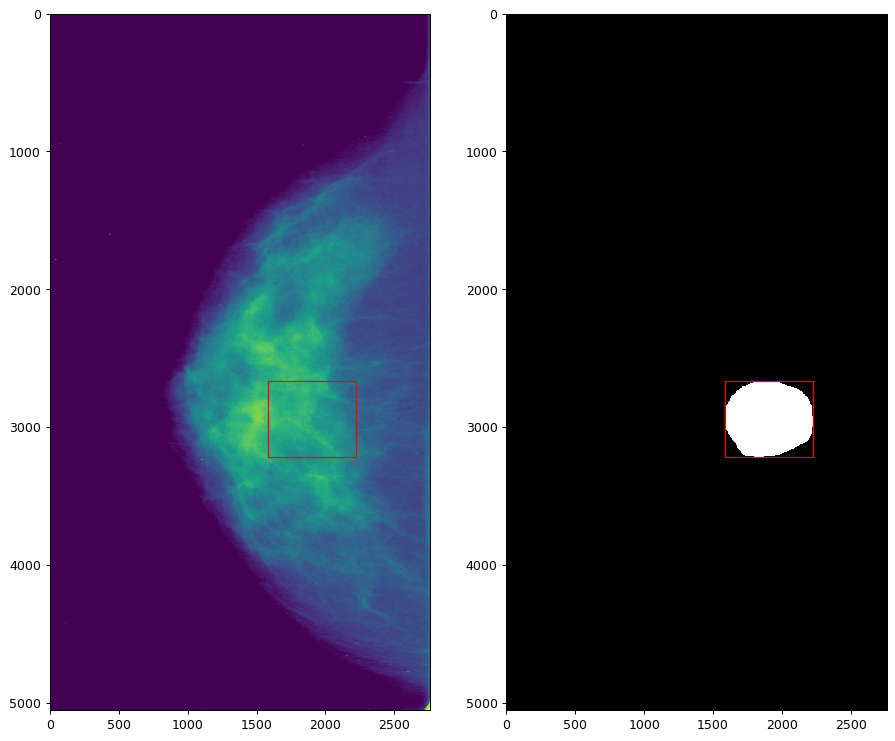

In [133]:
y1, x1, y2, x2 = extract_bboxes(mask_path)
width = x2 - x1
height = y2 - y1
im = np.array(Image.open(img_path), dtype=np.uint64)
mask_im = img_to_array(load_img(mask_path))

# Create a Rectangle patch
rect = patches.Rectangle((x1,y1),width,height,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((x1,y1),width,height,linewidth=1,edgecolor='r',facecolor='none')
# Create figure and axes
fig,ax = plt.subplots(1,2, figsize=(12,12), dpi = 90)
ax[0].imshow(im)
ax[0].add_patch(rect)
ax[1].imshow(mask_im)
ax[1].add_patch(rect2)
plt.show()